# Librerías y csv

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv", encoding='latin1')
datos

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9
...,...,...,...,...,...,...,...
195,196,196,38.2,3.7,13.8,248.841073,7.6
196,197,197,94.2,4.9,8.1,118.041856,9.7
197,198,198,177.0,9.3,6.4,213.274671,12.8
198,199,199,283.6,42.0,66.2,237.498063,25.5


## Variable independiente y dependiente

### TV

In [5]:
datos['TV'].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

### Sales

In [6]:
datos['Sales'].describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

## Visualizar la dispersión de los datos

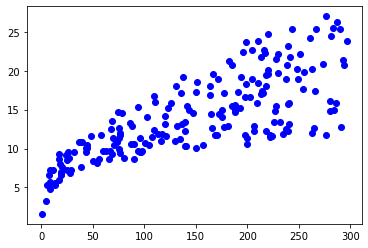

In [7]:
plt.plot(datos['TV'], datos['Sales'], 'o', color= 'blue')

## Construir Datos de entrenamiento y validación

In [25]:
TV = datos[['TV']].to_numpy()
Sales = datos[['Sales']].to_numpy()
TV_train, TV_test, Sales_train, Sales_test = train_test_split(TV, Sales, test_size=0.2, random_state=2022)

In [26]:
TV_train.shape

(160, 1)

In [27]:
TV_test.shape

(40, 1)

### Entrenamiento

In [28]:
TV_train[1:10]

array([[  8.4],
       [215.4],
       [ 76.4],
       [273.7],
       [225.8],
       [112.9],
       [177. ],
       [ 85.7],
       [ 69. ]])

### Validación

In [30]:
TV_test[1:10]

array([[ 13.2],
       [253.8],
       [265.2],
       [289.7],
       [193.7],
       [218.5],
       [149.8],
       [ 19.6],
       [ 48.3]])

# Modelo de regresión lineal simple

In [31]:
modelo_ls = LinearRegression()
modelo_ls.fit(TV_train, Sales_train)

LinearRegression()

## Coeficientes

In [32]:
a = modelo_ls.intercept_
b = modelo_ls.coef_

print(f"Valor de a: {a}")
print(f"Valor de b: {b}")

Valor de a: [7.3321113]
Valor de b: [[0.0452205]]


## Estimación lineal

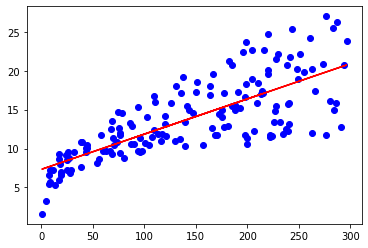

In [33]:
linea_tendencia = modelo_ls.predict(TV_train)
plt.plot(TV_train, Sales_train, 'o', color= 'blue')
plt.plot(TV_train, linea_tendencia, color="red")

## Predicciones del modelo

In [34]:
TV_train[1:10]

array([[  8.4],
       [215.4],
       [ 76.4],
       [273.7],
       [225.8],
       [112.9],
       [177. ],
       [ 85.7],
       [ 69. ]])

In [35]:
predicciones = modelo_ls.predict(TV_test)
predicciones[1:10]

array([[ 7.92902185],
       [18.80907326],
       [19.32458692],
       [20.43248908],
       [16.09132143],
       [17.21278974],
       [14.10614164],
       [ 8.21843303],
       [ 9.51626127]])

In [36]:
diccionario = {'TV': TV_test.flatten().tolist(),
                'Real' : Sales_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
diccionario

{'TV': [210.8,
  13.2,
  253.8,
  265.2,
  289.7,
  193.7,
  218.5,
  149.8,
  19.6,
  48.3,
  97.2,
  280.2,
  164.5,
  123.1,
  218.4,
  131.7,
  266.9,
  171.3,
  216.8,
  229.5,
  8.6,
  66.1,
  90.4,
  202.5,
  50.0,
  217.7,
  187.9,
  281.4,
  239.9,
  213.5,
  75.3,
  5.4,
  139.2,
  206.9,
  292.9,
  140.3,
  136.2,
  237.4,
  75.5,
  36.9],
 'Real': [23.8,
  5.6,
  17.6,
  12.7,
  25.4,
  19.2,
  12.2,
  10.1,
  7.6,
  11.6,
  9.6,
  14.8,
  14.5,
  15.2,
  18.0,
  12.9,
  25.4,
  19.0,
  22.3,
  19.7,
  4.8,
  8.6,
  8.7,
  16.6,
  8.4,
  19.4,
  14.7,
  24.4,
  23.2,
  21.7,
  11.3,
  5.3,
  12.2,
  12.9,
  21.4,
  10.3,
  13.2,
  18.9,
  9.9,
  10.8],
 'Predicho': [16.86459191827496,
  7.929021849741516,
  18.80907325909955,
  19.324586916899555,
  20.432489076206586,
  16.09132143157495,
  17.21278973977146,
  14.106141644081944,
  8.218433026050292,
  9.516261269809958,
  11.727543538794196,
  20.002894361373247,
  14.770882939666164,
  12.898754392918772,
  17.208267690

In [37]:
comparaciones = pd.DataFrame(diccionario)
comparaciones

,TV,Real,Predicho
0,210.8,23.8,16.864592
1,13.2,5.6,7.929022
2,253.8,17.6,18.809073
3,265.2,12.7,19.324587
4,289.7,25.4,20.432489
5,193.7,19.2,16.091321
6,218.5,12.2,17.212790
7,149.8,10.1,14.106142
8,19.6,7.6,8.218433
9,48.3,11.6,9.516261


## Valor de R Square

In [40]:
r = np.corrcoef(comparaciones['Real'], comparaciones['Predicho'])
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('R Square :', np.round(r, 4) )
print('R Square :', r2_score(comparaciones['Real'], comparaciones['Predicho'] ))

R Square : 0.7066
R Square : 0.6786607113562172


## Evaluar predicciones con rmse

In [41]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(Sales_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Sales_test, predicciones)))
rmse = []
rmse.append(np.sqrt(metrics.mean_squared_error(Sales_test, predicciones)))

rmse

Mean Squared Error: MSE 10.758919384356258
Root Mean Squared Error RMSE: 3.2800791734889962


[3.2800791734889962]

# Modelo de regresión polinomial de segundo nivel

In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg =  PolynomialFeatures(degree = 2)

TV_poly = poly_reg.fit_transform(TV_train)

modelo_poly2 = LinearRegression()
modelo_poly2.fit(TV_poly, Sales_train)

LinearRegression()

## Curva de tendencia

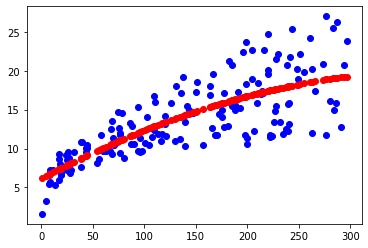

In [43]:
curva_tendencia = modelo_poly2.predict(poly_reg.fit_transform(TV_train))
plt.scatter(TV_train, Sales_train, color = 'b', )
plt.scatter(TV_train, curva_tendencia, color='r', linestyle = 'solid')
plt.show()

## Predicciones del modelo

In [44]:
predicciones = modelo_poly2.predict(poly_reg.fit_transform(TV_test))
predicciones

array([[17.10102159],
       [ 7.05923067],
       [18.34687173],
       [18.62085883],
       [19.12983113],
       [16.51226688],
       [17.34879495],
       [14.75764287],
       [ 7.49557613],
       [ 9.36084761],
       [12.19442006],
       [18.94541296],
       [15.3841554 ],
       [13.51932744],
       [17.34564612],
       [13.9323189 ],
       [18.65969453],
       [15.66069634],
       [17.29501786],
       [17.68408015],
       [ 6.7410131 ],
       [10.44255401],
       [11.82637853],
       [16.8218835 ],
       [ 9.46664173],
       [17.32355345],
       [16.30051278],
       [18.96961221],
       [17.98086951],
       [17.1891289 ],
       [10.9790845 ],
       [ 6.51737808],
       [14.28152225],
       [16.97141838],
       [19.18826098],
       [14.33187981],
       [14.14306666],
       [17.91131913],
       [10.9905775 ],
       [ 8.63784517]])

### Tabla de comparaciones

In [46]:
diccionario = {'TV': TV_test.flatten().tolist(),
                'Real' : Sales_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
comparaciones = pd.DataFrame(diccionario)
comparaciones.head(10)

,TV,Real,Predicho
0,210.8,23.8,17.101022
1,13.2,5.6,7.059231
2,253.8,17.6,18.346872
3,265.2,12.7,18.620859
4,289.7,25.4,19.129831
5,193.7,19.2,16.512267
6,218.5,12.2,17.348795
7,149.8,10.1,14.757643
8,19.6,7.6,7.495576
9,48.3,11.6,9.360848


## R Square

In [48]:
r = np.corrcoef(comparaciones['Real'], comparaciones['Predicho'])
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('R Square :', np.round(r, 4) )
print('R Square :', r2_score(comparaciones['Real'], comparaciones['Predicho'] ))

R Square : 0.6915
R Square : 0.6635856955459076


## Evaluar predicciones con rmse

In [51]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(Sales_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Sales_test, predicciones)))
rmse.append(np.sqrt(metrics.mean_squared_error(Sales_test, predicciones)))

rmse

Mean Squared Error: MSE 11.263653431990287
Root Mean Squared Error RMSE: 3.356136682554852


[3.2800791734889962, 3.356136682554852]

# Modelo de regresión polinomial de quinto nivel

In [52]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg =  PolynomialFeatures(degree = 5)

TV_poly = poly_reg.fit_transform(TV_train)

modelo_poly5 = LinearRegression()
modelo_poly5.fit(TV_poly, Sales_train)

LinearRegression()

## Curva de tendencia

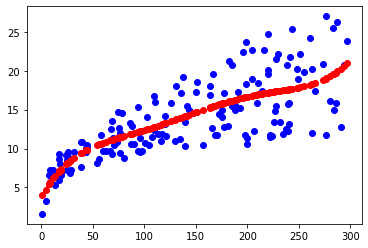

In [53]:
curva_tendencia = modelo_poly5.predict(poly_reg.fit_transform(TV_train))
plt.scatter(TV_train, Sales_train, color = 'b', )
plt.scatter(TV_train, curva_tendencia, color='r', linestyle = 'solid')
plt.show()

## Predicciones del modelo

In [54]:
predicciones = modelo_poly5.predict(poly_reg.fit_transform(TV_test))
predicciones

array([[16.96741471],
       [ 6.45261783],
       [17.92918139],
       [18.34279883],
       [20.15705169],
       [16.47298907],
       [17.14861932],
       [14.6389791 ],
       [ 7.41739808],
       [10.09950926],
       [12.26577374],
       [19.24948118],
       [15.32050862],
       [13.37840943],
       [17.14639889],
       [13.7778888 ],
       [18.42106026],
       [15.61848493],
       [17.110437  ],
       [17.37831204],
       [ 5.6407023 ],
       [11.01528188],
       [11.99543915],
       [16.74467097],
       [10.20225713],
       [17.13076767],
       [16.27333096],
       [19.34722112],
       [17.58885964],
       [17.03347099],
       [11.40050607],
       [ 5.00992877],
       [14.13357411],
       [16.86661372],
       [20.54032335],
       [14.18604548],
       [13.99076667],
       [17.5369695 ],
       [11.40855734],
       [ 9.28240884]])

### Tabla de comparaciones

In [56]:
diccionario = {'TV': TV_test.flatten().tolist(),
                'Real' : Sales_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
comparaciones = pd.DataFrame(diccionario)
comparaciones.head(10)

,TV,Real,Predicho
0,210.8,23.8,16.967415
1,13.2,5.6,6.452618
2,253.8,17.6,17.929181
3,265.2,12.7,18.342799
4,289.7,25.4,20.157052
5,193.7,19.2,16.472989
6,218.5,12.2,17.148619
7,149.8,10.1,14.638979
8,19.6,7.6,7.417398
9,48.3,11.6,10.099509


## Valor de R Square


In [58]:
r = np.corrcoef(comparaciones['Real'], comparaciones['Predicho'])
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('R Square :', np.round(r, 4) )
print('R Square :', r2_score(comparaciones['Real'], comparaciones['Predicho'] ))


R Square : 0.6981
R Square : 0.6743915606787871


## Evaluar predicciones con rmse

In [61]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(Sales_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Sales_test, predicciones)))
rmse.append(np.sqrt(metrics.mean_squared_error(Sales_test, predicciones)))

rmse

Mean Squared Error: MSE 10.901856926080441
Root Mean Squared Error RMSE: 3.301796015213605


[3.2800791734889962, 3.356136682554852, 3.301796015213605]

# Intepretación

In [62]:
rmse

[3.2800791734889962, 3.356136682554852, 3.301796015213605]

Yo utilicé el 20% de los datos para el entrenamiento y me resultó en que el modelo de regresión lineal simple es más efectivo, seguido del polinomial de quinto nivel y por último, el polinomial de segundo nivel fue el menos efectivo.